# HDBSCAN Clustering
## Clustering based on all 508 ward
This script applies the HDBSCAN algorithm to the 508 wards of Guateng. Each ward is represented as a row vector with 4096 features as extracted by a CNN in a previous section of this project.

## Libraries Used

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.cm as cm
from matplotlib import rcParams
import hdbscan
from itertools import product
import os

In [34]:
# setting plotting parameters

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
TITLE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE) 


rcParams['axes.titlepad'] = 20 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

In [35]:
CLUSTERS_DIR = os.path.join('../', 'visualisation_validation', 'cluster_labels')

In [36]:
# read in principal components
PCA_components1 = pd.read_csv("principal_components.csv")

df_labels = PCA_components1.iloc[:,:2]
PCA_components1 = PCA_components1.iloc[:,2:]

## HDBSCAN

In [37]:
X = PCA_components1.iloc[:,:18]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,0.389596,0.422751,-1.159653,-0.698179,0.910519,-1.047397,0.235061,0.068160,-0.453252,0.215496
1,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,0.615850,-1.655086,-1.000947,-0.762811,-1.226246,0.074544,-0.734501,0.104239,0.440623,0.959352
2,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,0.370838,0.327728,1.369470,-0.644578,0.265473,-0.203918,0.288098,-0.194351,0.016737,-1.253381
3,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,0.295048,0.957377,0.207443,-0.625556,-0.015602,-0.670103,-0.279263,0.736229,-0.214226,-1.236568
4,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,1.779652,2.351835,1.056302,-0.180806,1.988438,-1.447740,-0.661380,-0.847092,-0.331773,0.689556


In [38]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02
mean,4.475860e-16,1.118965e-16,-2.797412e-16,3.077154e-16,-2.517671e-16,5.594825e-17,1.118965e-16,-1.328771e-16,-6.993531e-17,-9.091590e-17,-1.118965e-16,-2.797412e-17,-5.594825e-17,-1.118965e-16,-1.328771e-16,6.993531e-18,7.692884e-17,6.294178e-17
std,1.083206e+01,5.240373e+00,5.155999e+00,4.223306e+00,2.792039e+00,2.696474e+00,2.414116e+00,1.941706e+00,1.873693e+00,1.754261e+00,1.708992e+00,1.579955e+00,1.406690e+00,1.333795e+00,1.255005e+00,1.220057e+00,1.074021e+00,1.030924e+00
min,-2.077552e+01,-1.757206e+01,-1.072604e+01,-1.154064e+01,-8.756535e+00,-7.212919e+00,-6.181638e+00,-5.638188e+00,-6.168950e+00,-5.061745e+00,-5.355626e+00,-4.562786e+00,-3.991318e+00,-4.492905e+00,-3.233588e+00,-4.327381e+00,-3.582181e+00,-4.817237e+00
25%,-8.397636e+00,-3.184463e+00,-4.078818e+00,-2.986562e+00,-1.764763e+00,-1.817374e+00,-1.458046e+00,-1.349463e+00,-1.145721e+00,-1.138095e+00,-1.205796e+00,-8.905523e-01,-8.586059e-01,-8.049659e-01,-8.311649e-01,-7.050726e-01,-7.783517e-01,-6.013914e-01
50%,-2.124821e-01,-1.643906e-01,-1.969252e-01,-2.308030e-01,-2.174967e-01,-5.180159e-02,-5.634679e-02,-9.863862e-02,1.071297e-01,-4.377096e-02,3.831439e-02,5.092937e-02,4.691179e-02,8.149954e-02,-9.321673e-02,-2.544410e-03,-1.634844e-02,4.070746e-03
75%,7.183582e+00,2.762273e+00,3.729531e+00,2.845900e+00,1.369794e+00,1.882794e+00,1.443900e+00,1.256235e+00,1.236879e+00,1.034240e+00,1.097667e+00,1.057530e+00,9.479437e-01,8.270119e-01,7.405156e-01,7.027748e-01,6.514863e-01,6.484755e-01
max,3.898810e+01,1.796658e+01,1.367753e+01,1.290277e+01,1.320733e+01,8.438370e+00,1.035866e+01,6.364047e+00,8.305284e+00,8.331119e+00,7.140241e+00,4.600257e+00,5.953834e+00,4.667196e+00,4.601935e+00,4.886935e+00,4.253174e+00,5.431946e+00


In [39]:
# if the features need to be scaled, set scale=True.

scale = False
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X)) if scale else X
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,0.389596,0.422751,-1.159653,-0.698179,0.910519,-1.047397,0.235061,0.068160,-0.453252,0.215496
1,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,0.615850,-1.655086,-1.000947,-0.762811,-1.226246,0.074544,-0.734501,0.104239,0.440623,0.959352
2,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,0.370838,0.327728,1.369470,-0.644578,0.265473,-0.203918,0.288098,-0.194351,0.016737,-1.253381
3,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,0.295048,0.957377,0.207443,-0.625556,-0.015602,-0.670103,-0.279263,0.736229,-0.214226,-1.236568
4,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,1.779652,2.351835,1.056302,-0.180806,1.988438,-1.447740,-0.661380,-0.847092,-0.331773,0.689556


## 18 PCs

Grid search for the optimal parameter values for {min_cluster_size, min_samples} when using the first 18 PCs. 

In [41]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 20, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples)) # all combinations of the paramter ranges
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled)
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    # sil score and davies score throw an error when only one cluster. So try-except is to catch these cases.
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df_labels.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df_labels.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_18 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_18.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_18

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
56,5,0.076538,0.331322,0.510241,8,4,233
38,5,0.076538,0.331322,0.510241,7,4,233
74,5,0.076538,0.331322,0.510241,9,4,233
3,5,0.079911,0.313232,0.416054,5,5,210
1,10,0.074063,0.053252,0.315995,5,3,149
...,...,...,...,...,...,...,...
391,1,0.000000,0.000000,0.000000,26,15,0
392,1,0.000000,0.000000,0.000000,26,16,0
393,1,0.000000,0.000000,0.000000,26,17,0
394,1,0.000000,0.000000,0.000000,26,18,0


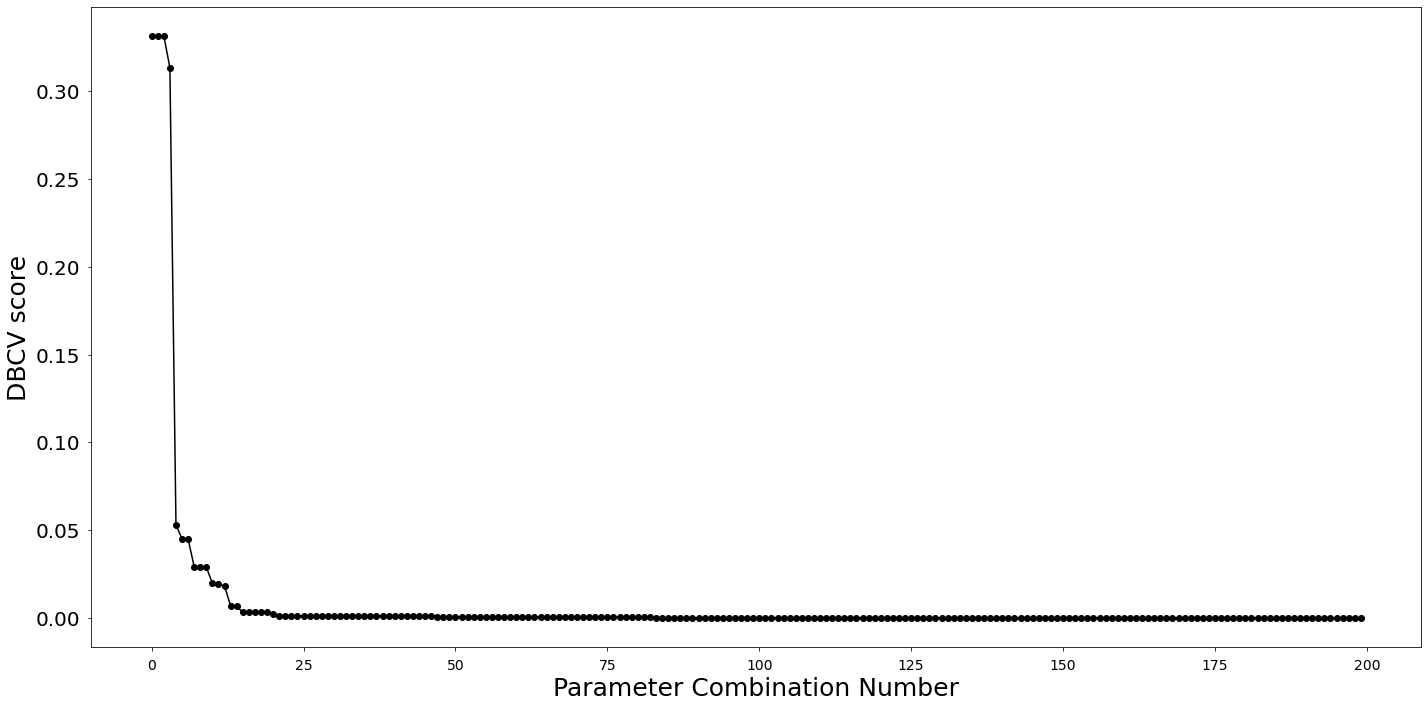

In [42]:
# plotting the DBCV score

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', fontsize=25) # , color=color
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], marker='o', color="black")
ax1.tick_params(axis='y', labelsize=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

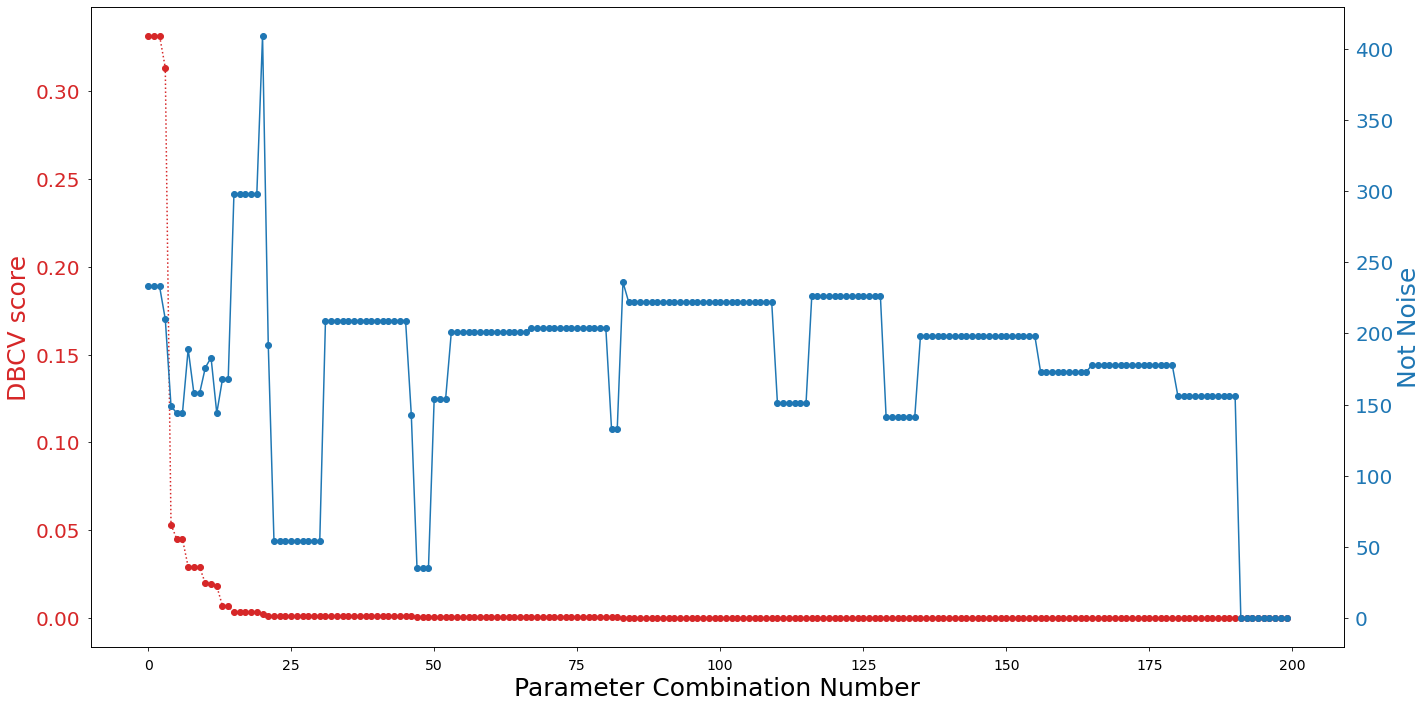

In [43]:
# plotting the DBCV score vs the number of wards not assigned as noise.

fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25) 
ax2.plot(np.arange(200), res_df_18['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Max DBCV

Examining which parameter combinations obtained the largest DBCV score.

In [44]:
res_df_18[res_df_18['dbcv_score'] > 0.3]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
56,5,0.076538,0.331322,0.510241,8,4,233
38,5,0.076538,0.331322,0.510241,7,4,233
74,5,0.076538,0.331322,0.510241,9,4,233
3,5,0.079911,0.313232,0.416054,5,5,210


As outlined in the paper, the "best" solution has <code>min_cluster_size=7</code> and <code>min_samples=4</code>. Fitting the HDBSCAN algorithm with this combination:

In [45]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=4, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=7, min_samples=4)

In [46]:
# Checking the DBCV and silhouette score to confirm performance.
clusterer.relative_validity_, silhouette_score(X_scaled[clusterer.labels_ != -1], clusterer.labels_[clusterer.labels_ != -1] , metric='euclidean') * sum(clusterer.labels_ != -1)/df_labels.shape[0]

(0.3313219146371114, 0.07653811963876214)

In [47]:
# Number of clusters that are not noise.
sum(clusterer.labels_ != -1)

233

In [48]:
# Checking the number of wards in each cluster
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ ==i)} wards')

Cluser 0 has 10 wards
Cluser 1 has 203 wards
Cluser 2 has 10 wards
Cluser 3 has 10 wards
Cluser -1 has 275 wards


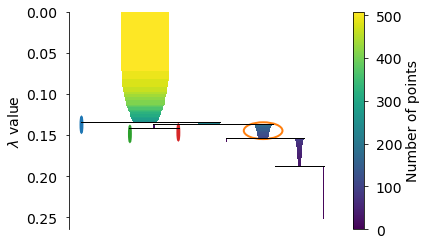

In [49]:
# Visualising solution in condensed dendrogram
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [50]:
# Aligning cluster solution with municipality and ward number.
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,1
1,2,Emfuleni,1
2,3,Emfuleni,1
3,4,Emfuleni,1
4,5,Emfuleni,-1


In [51]:
df_cluster.to_csv(os.path.join(CLUSTERS_DIR, 'HDBSCAN_clusters_18.csv'))

## 6 PCs

Grid search for the optimal parameter values for {min_cluster_size, min_samples} when using the first 6 PCs. 

In [52]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 20, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples))
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled.iloc[:,:6])
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df_labels.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df_labels.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_6 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_6.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_6

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
55,8,0.068574,0.107687,0.413102,8,3,170
73,8,0.068574,0.107687,0.413102,9,3,170
91,7,0.065139,0.092264,0.385965,10,3,161
38,9,0.078971,0.082858,0.272564,7,4,129
20,9,0.078971,0.082858,0.272564,6,4,129
...,...,...,...,...,...,...,...
403,1,0.000000,0.000000,0.000000,27,9,0
404,1,0.000000,0.000000,0.000000,27,10,0
406,1,0.000000,0.000000,0.000000,27,12,0
407,1,0.000000,0.000000,0.000000,27,13,0


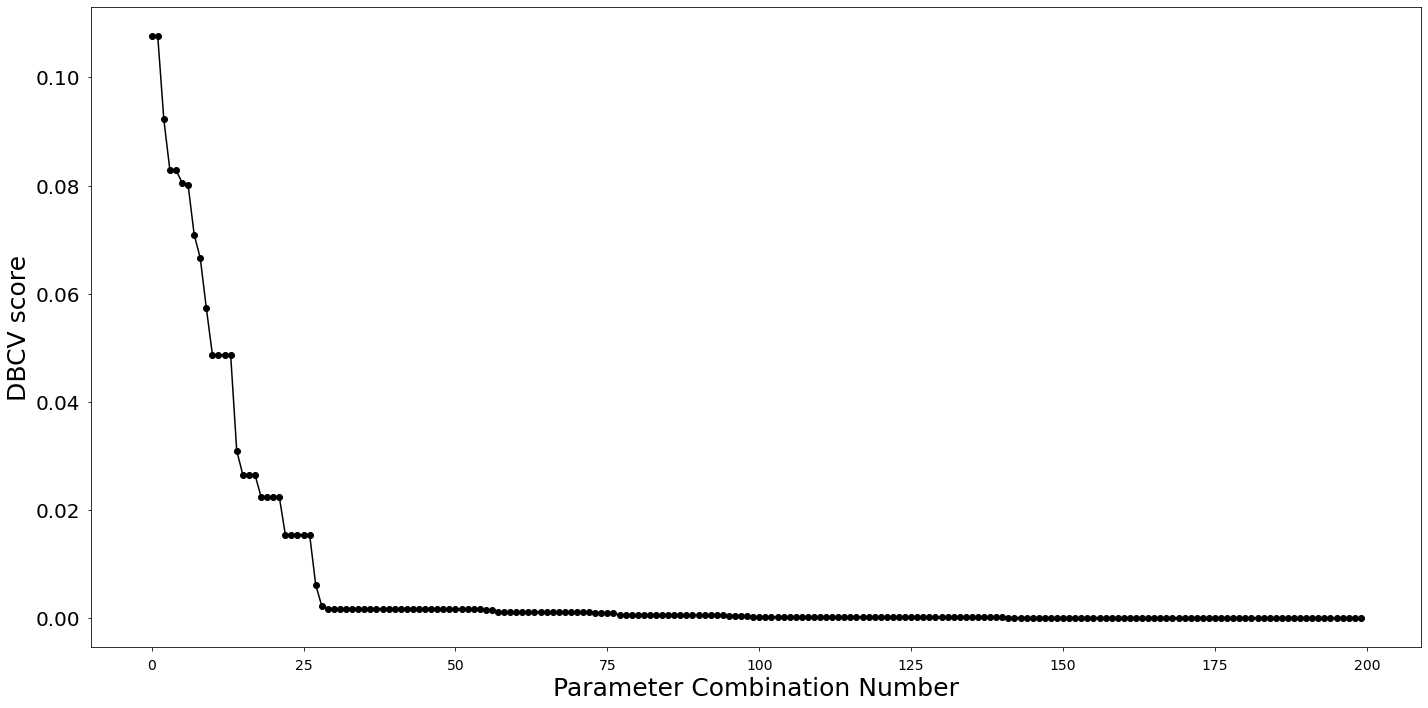

In [53]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'black'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_6['dbcv_score'][:200], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

It is noted at the above plot is marginally different to the one seen in the paper. It appears that the only difference is the inclusion of new clustering solutions that have DBCV scores above 0.1. However, since they have so many wards assigned as noise, the chosen clustering solution in the paper (which is still present here) remains valid.

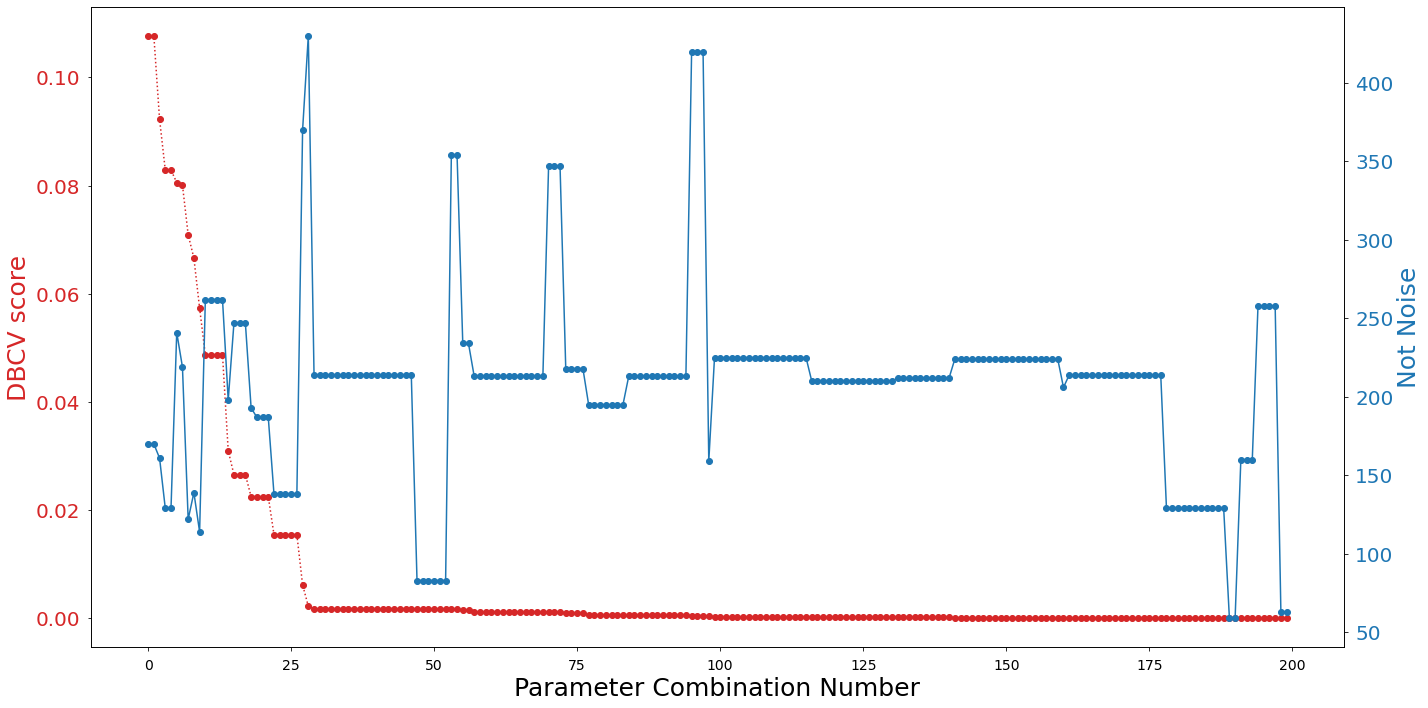

In [54]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_6['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25) 
ax2.plot(np.arange(200), res_df_6['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Max DBCV

Examining which parameter combinations obtained the largest DBCV score.

In [55]:
res_df_6[res_df_6['dbcv_score'] > 0.08]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
55,8,0.068574,0.107687,0.413102,8,3,170
73,8,0.068574,0.107687,0.413102,9,3,170
91,7,0.065139,0.092264,0.385965,10,3,161
38,9,0.078971,0.082858,0.272564,7,4,129
20,9,0.078971,0.082858,0.272564,6,4,129
108,9,0.015358,0.080559,0.743328,11,2,241
126,7,0.007490,0.080110,0.706522,12,2,219


As outlined in the paper, the "best" solution has <code>min_cluster_size=11</code> and <code>min_samples=2</code>. Fitting the HDBSCAN algorithm with this combination:

In [56]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=11, min_samples=2, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled.iloc[:,:6])

HDBSCAN(gen_min_span_tree=True, min_cluster_size=11, min_samples=2)

In [57]:
# Checking the DBCV and silhouette score to confirm performance.
clusterer.relative_validity_, silhouette_score(X_scaled[clusterer.labels_ != -1], clusterer.labels_[clusterer.labels_ != -1] , metric='euclidean') * sum(clusterer.labels_ != -1)/df_labels.shape[0]

(0.08055937347338352, 0.015357643896475459)

In [58]:
# Number of clusters that are not noise.
sum(clusterer.labels_ != -1)

241

In [59]:
# Checking the number of wards in each cluster
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ == i)} wards')

Cluser 0 has 16 wards
Cluser 1 has 12 wards
Cluser 2 has 11 wards
Cluser 3 has 11 wards
Cluser 4 has 19 wards
Cluser 5 has 13 wards
Cluser 6 has 12 wards
Cluser 7 has 147 wards
Cluser -1 has 267 wards


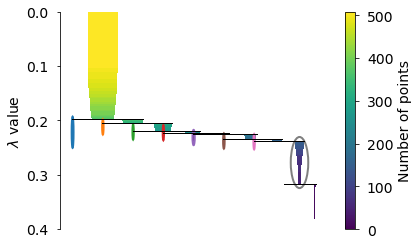

In [60]:
# Visualising solution in condensed dendrogram
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [61]:
# Aligning cluster solution with municipality and ward number.
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,6
1,2,Emfuleni,-1
2,3,Emfuleni,-1
3,4,Emfuleni,7
4,5,Emfuleni,-1


In [62]:
df_cluster.to_csv(os.path.join(CLUSTERS_DIR, "HDBSCAN_clusters_6.csv"))